Fitting a linear per parts function

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl

def make_test_data(seg_count, point_count):
    x = np.random.uniform(2, 10, seg_count)
    x = np.cumsum(x)
    x *= 10 / x.max()
    y = np.cumsum(np.random.uniform(-1, 1, seg_count))
    X = np.random.uniform(0, 10, point_count)
    Y = np.interp(X, x, y) + np.random.normal(0, 0.05, point_count)
    return X, Y

In [2]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

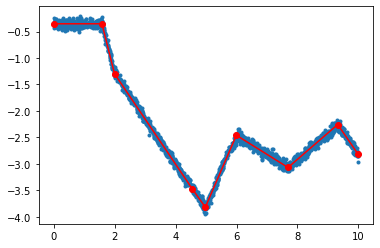

In [3]:
X, Y = make_test_data(10, 2000)
px, py = segments_fit(X, Y, 8)

pl.plot(X, Y, ".")
pl.plot(px, py, "-or");